# Create models to scale the usability of the model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#plot stuff
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from mycolorpy import colorlist as mcp
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

#machine learning models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

## load in train and predict data

In [2]:
usabilityTrainData = pd.read_csv('PathUsababilityTrainData.csv')
usabilityPredictData = pd.read_csv('PathUsababilityPredictData.csv') 

In [3]:
usabilityTrainData

,Unnamed: 0,0,1,2,3,4
0,0,ABOUT1_SBS1A3c7a_950_1280.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT1/ABOUT1_SB...,9,10.433333,3
1,1,ABOUT2_AAPB2c7a_310_800.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AA...,13,14.125000,2
2,2,ABOUT2_AJPB2c7a_1135_2270.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AJ...,28,11.273684,3
3,3,ABOUT2_AMGA1c2a_1580_1820.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,6,13.614035,1
4,4,ABOUT2_AMGA1c2a_730_1170.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,11,13.614035,3
...,...,...,...,...,...,...
1196,1196,GUFFAW_SPKA1c2a_94460_95534.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,27,14.893939,2
1197,1197,GUFFAW_SPKA1c2a_97627_98347.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,18,14.893939,3
1198,1198,GUFFAW_STCA1c2b_11788_13018.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_ST...,31,10.267123,3
1199,1199,HALF_ACAA2c6ii_4780_5050.mp4,D:/Thesis/Video-Auslan-sorted/HALF/HALF_ACAA2c...,7,10.360000,1


In [4]:
usabilityPredictData

,Unnamed: 0,0,1,2,3
0,0,AGAIN_SASA2c7a_91890_92050.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SASA...,4,10.689873
1,1,AGAIN_SGMB1c2a_49780_50510.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,18,11.873874
2,2,AGAIN_SGMB1c2a_88595_88950.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,9,11.873874
3,3,AGAIN_SLRB1c2b_26330_26550.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SLRB...,5,15.806250
4,4,AGAIN_SMGB1c2a_121717_122687.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SMGB...,25,16.389313
...,...,...,...,...,...
12696,12696,ZOOM-OFF_STBA1c2b_36540_37860.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF/ZOOM-OF...,33,18.894737
12697,12697,ZOOM-OFF(7)_AASB2c6iii_31980_32880.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,23,11.617021
12698,12698,ZOOM-OFF(7)_ARGB2c6iii_41620_42200.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,15,13.710526
12699,12699,ZOOM-OFF(S)_MCDB2c6iii_41420_42210.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(S)/ZOOM...,20,11.804348


# Data selection

In [22]:
data = np.array(usabilityTrainData)
X = np.array([data.T[3], data.T[4]], dtype=int).T
y = np.array([data.T[5]],dtype=int).T
newY = []
for i in y:
    if i >= 3:
        newY.append(1)
    else:
        newY.append(0)
y = np.array(newY).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [23]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Linear Discriminant Analysis
X = xTrain
y = yTrain
clf = LinearDiscriminantAnalysis()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


training acuracy:  0.7677083333333333
validation acuracy:  0.7800829875518672
training error:  0.23229166666666667
validation error:  0.21991701244813278


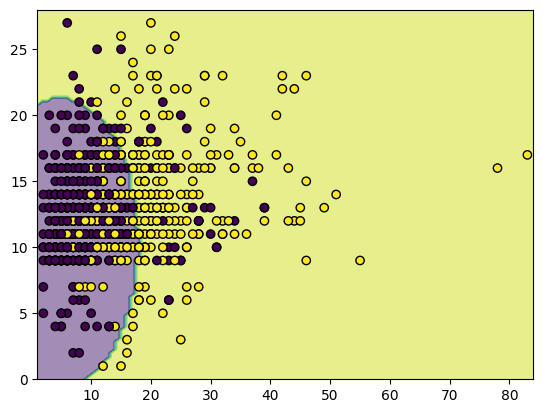

In [27]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [28]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Gaussian Naive Bayes
X = xTrain
y = yTrain
clf = GaussianNB()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
pd.DataFrame(cfTest).to_csv("GaussianNaiveBayesConfusion.csv")

training acuracy:  0.7583333333333333
validation acuracy:  0.7593360995850622
training error:  0.2416666666666667
validation error:  0.2406639004149378


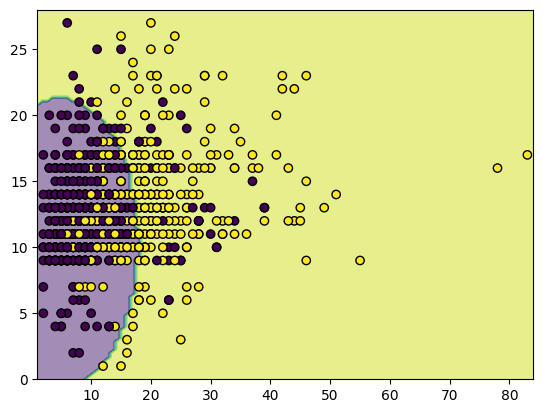

In [30]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [38]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test
# make = pd.DataFrame(data1Make)
# make = make.drop(0, axis=1)
# make = make.drop(10, axis=1)

# KNeighbors Classifier
X = xTrain
y = yTrain

bottom = 9
top = 10
step = 3
predictClass = []
kNeighborsPredictions = []
for i in range(bottom, top,step):
    print("\nNumber of Neigbours: ", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X, y)
    kNeighborsPredictions.append(clf)
    # Error calculation
    print("training acuracy: ", clf.score(X, y))
    print("validation acuracy: ", clf.score(xTest, yTest))
    print("training error: ", 1 - clf.score(X, y))
    print("validation error: ", 1- clf.score(xTest, yTest))
    
    # predictClass = clf.predict(make)
    
    # Confusion matrix
    yPredictTrain = clf.predict(X)
    yPredictTest = clf.predict(xTest)

    cfTrain = confusion_matrix(yTrain, yPredictTrain)
    cfTest = confusion_matrix(yTest, yPredictTest)
# predictdf = pd.concat([make , pd.DataFrame(predictClass,columns=['class'])] , axis = 1)
# predictdf.to_csv("predict.csv")
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


Number of Neigbours:  9
training acuracy:  0.8125
validation acuracy:  0.7717842323651453
training error:  0.1875
validation error:  0.22821576763485474


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


NameError: name 'make' is not defined

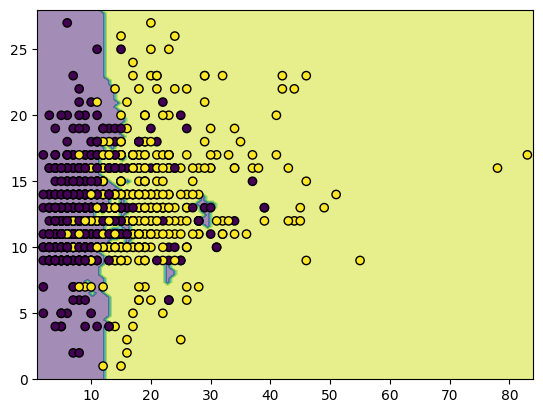

In [37]:
n = 0
for i in range(bottom, top,step):
    # ploting graph
    disp = DecisionBoundaryDisplay.from_estimator(kNeighborsPredictions[n], X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    n += 1

## DecisionTreeClassifier
A decision tree classifier.

In [ ]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# Quadratic model
X = xTrain
y = yTrain
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

In [ ]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

## RandomForestClassifier
A random forest classifier.

In [59]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# RandomForestClassifier
X = xTrain
y = yTrain
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

ValueError: Unknown label type: 'unknown'

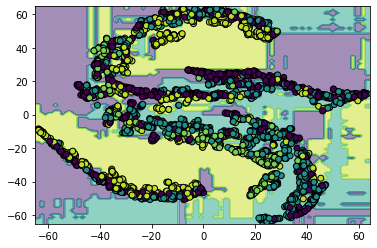

In [ ]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()

## MLP NeuralNetwork
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [ ]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP NeuralNetwork
X = xTrain
y = yTrain

activation = ['identity', 'logistic', 'tanh', 'relu']
classifiers = []
for func in activation:
    clf = MLPClassifier(random_state=1, max_iter=5000, activation=func)
    clf.fit(X, y)
    classifiers.append(clf)
classifiers

[MLPClassifier(activation='identity', max_iter=5000, random_state=1),
 MLPClassifier(activation='logistic', max_iter=5000, random_state=1),
 MLPClassifier(activation='tanh', max_iter=5000, random_state=1),
 MLPClassifier(max_iter=5000, random_state=1)]

In [ ]:
# Error calculation
it = 0
historgramData = []
for func in activation:
    clf = classifiers[it]
    print(func, " training acuracy: ", clf.score(X, y))
    print(func, " validation acuracy: ", clf.score(xTest, yTest))
    print(func, " training error: ", 1 - clf.score(X, y))
    print(func, " validation error: ", 1- clf.score(xTest, yTest))
    historgramData.append(clf.score(xTest, yTest))
    
    # Confusion matrix
    yPredictTrain = clf.predict(X)
    yPredictTest = clf.predict(xTest)
    
#     cfTrain = confusion_matrix(yTrain, yPredictTrain)
#     cfTest = confusion_matrix(yTest, yPredictTest)
#     pd.DataFrame(cfTest).to_csv(func+"MLP.csv")
    
#     # ploting graph
#     disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, xlabel=func)
#     disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
#     plt.show()
    it += 1

ValueError: X has 2 features, but MLPClassifier is expecting 9 features as input.

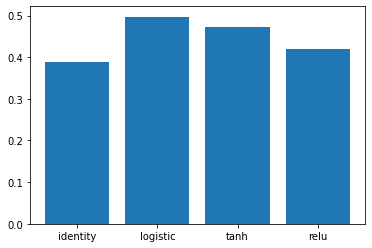

In [ ]:
plt.figure("Accuracy based on activation function")
plt.bar(activation, height=historgramData)
plt.show()

## AdaBoostClassifier
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [ ]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP AdaBoostClassifier
X = xTrain
y = yTrain
clf = AdaBoostClassifier(n_estimators=300, random_state=0)
clf.fit(X, y)

NameError: name 'xTrainML' is not defined

In [ ]:
# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("AdaBoostClassifier.csv")

In [ ]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.show()